Build a regression model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

sum_df = pd.read_csv('../data/sum_df.csv')
sum_df.head()

,Station_name,Bikes,Arts & Entertainment,"Bars, Restaurants & Cafes","Landmarks, Parks & Sports",Municipal,Retail,Schools,Total POIs
0,10th & Cambie,35,26.0,93.0,76.0,4.0,99.0,4.0,302.0
1,10th & Columbia,14,7.0,24.0,14.0,0.0,19.0,0.0,64.0
2,10th & Commercial,26,8.0,41.0,8.0,2.0,27.0,1.0,87.0
3,10th & Fraser,14,4.0,19.0,3.0,0.0,9.0,0.0,35.0
4,10th & Granville,14,20.0,62.0,26.0,2.0,77.0,1.0,188.0


In [10]:
y = sum_df['Bikes']
X = sum_df.drop(['Station_name', 'Bikes', 'Bars, Restaurants & Cafes', 'Retail', 'Schools', 'Total POIs', 'Arts & Entertainment', 'Municipal'], axis=1)
X= sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Bikes   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     7.029
Date:                Sun, 23 Apr 2023   Prob (F-statistic):            0.00856
Time:                        21:47:44   Log-Likelihood:                -744.14
No. Observations:                 241   AIC:                             1492.
Df Residuals:                     239   BIC:                             1499.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

This model only has an Adjusted R-Squared value of .025, therefore it is not very reliable. One cause of this might be the non-normal distribution of my variables. Below I will attempt to normalize the data and rerun the modeling.

In [17]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
sum_normal = pd.DataFrame()
categories = ['Arts & Entertainment', 'Bars, Restaurants & Cafes', 'Landmarks, Parks & Sports', 'Municipal', 'Retail', 'Schools', 'Total POIs']
for cat in categories:
    x1 = qt.fit_transform(sum_df[cat].values.reshape(-1, 1))
    sum_normal[cat] = [ x[0] for x in x1]
sum_normal['Bikes'] = sum_df['Bikes']

c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (241). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (241). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (241). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\preprocessing\_data.py:2623: UserWarning: n_quantiles (1000) is greater than the total number of samples (241). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\preprocessing\_da

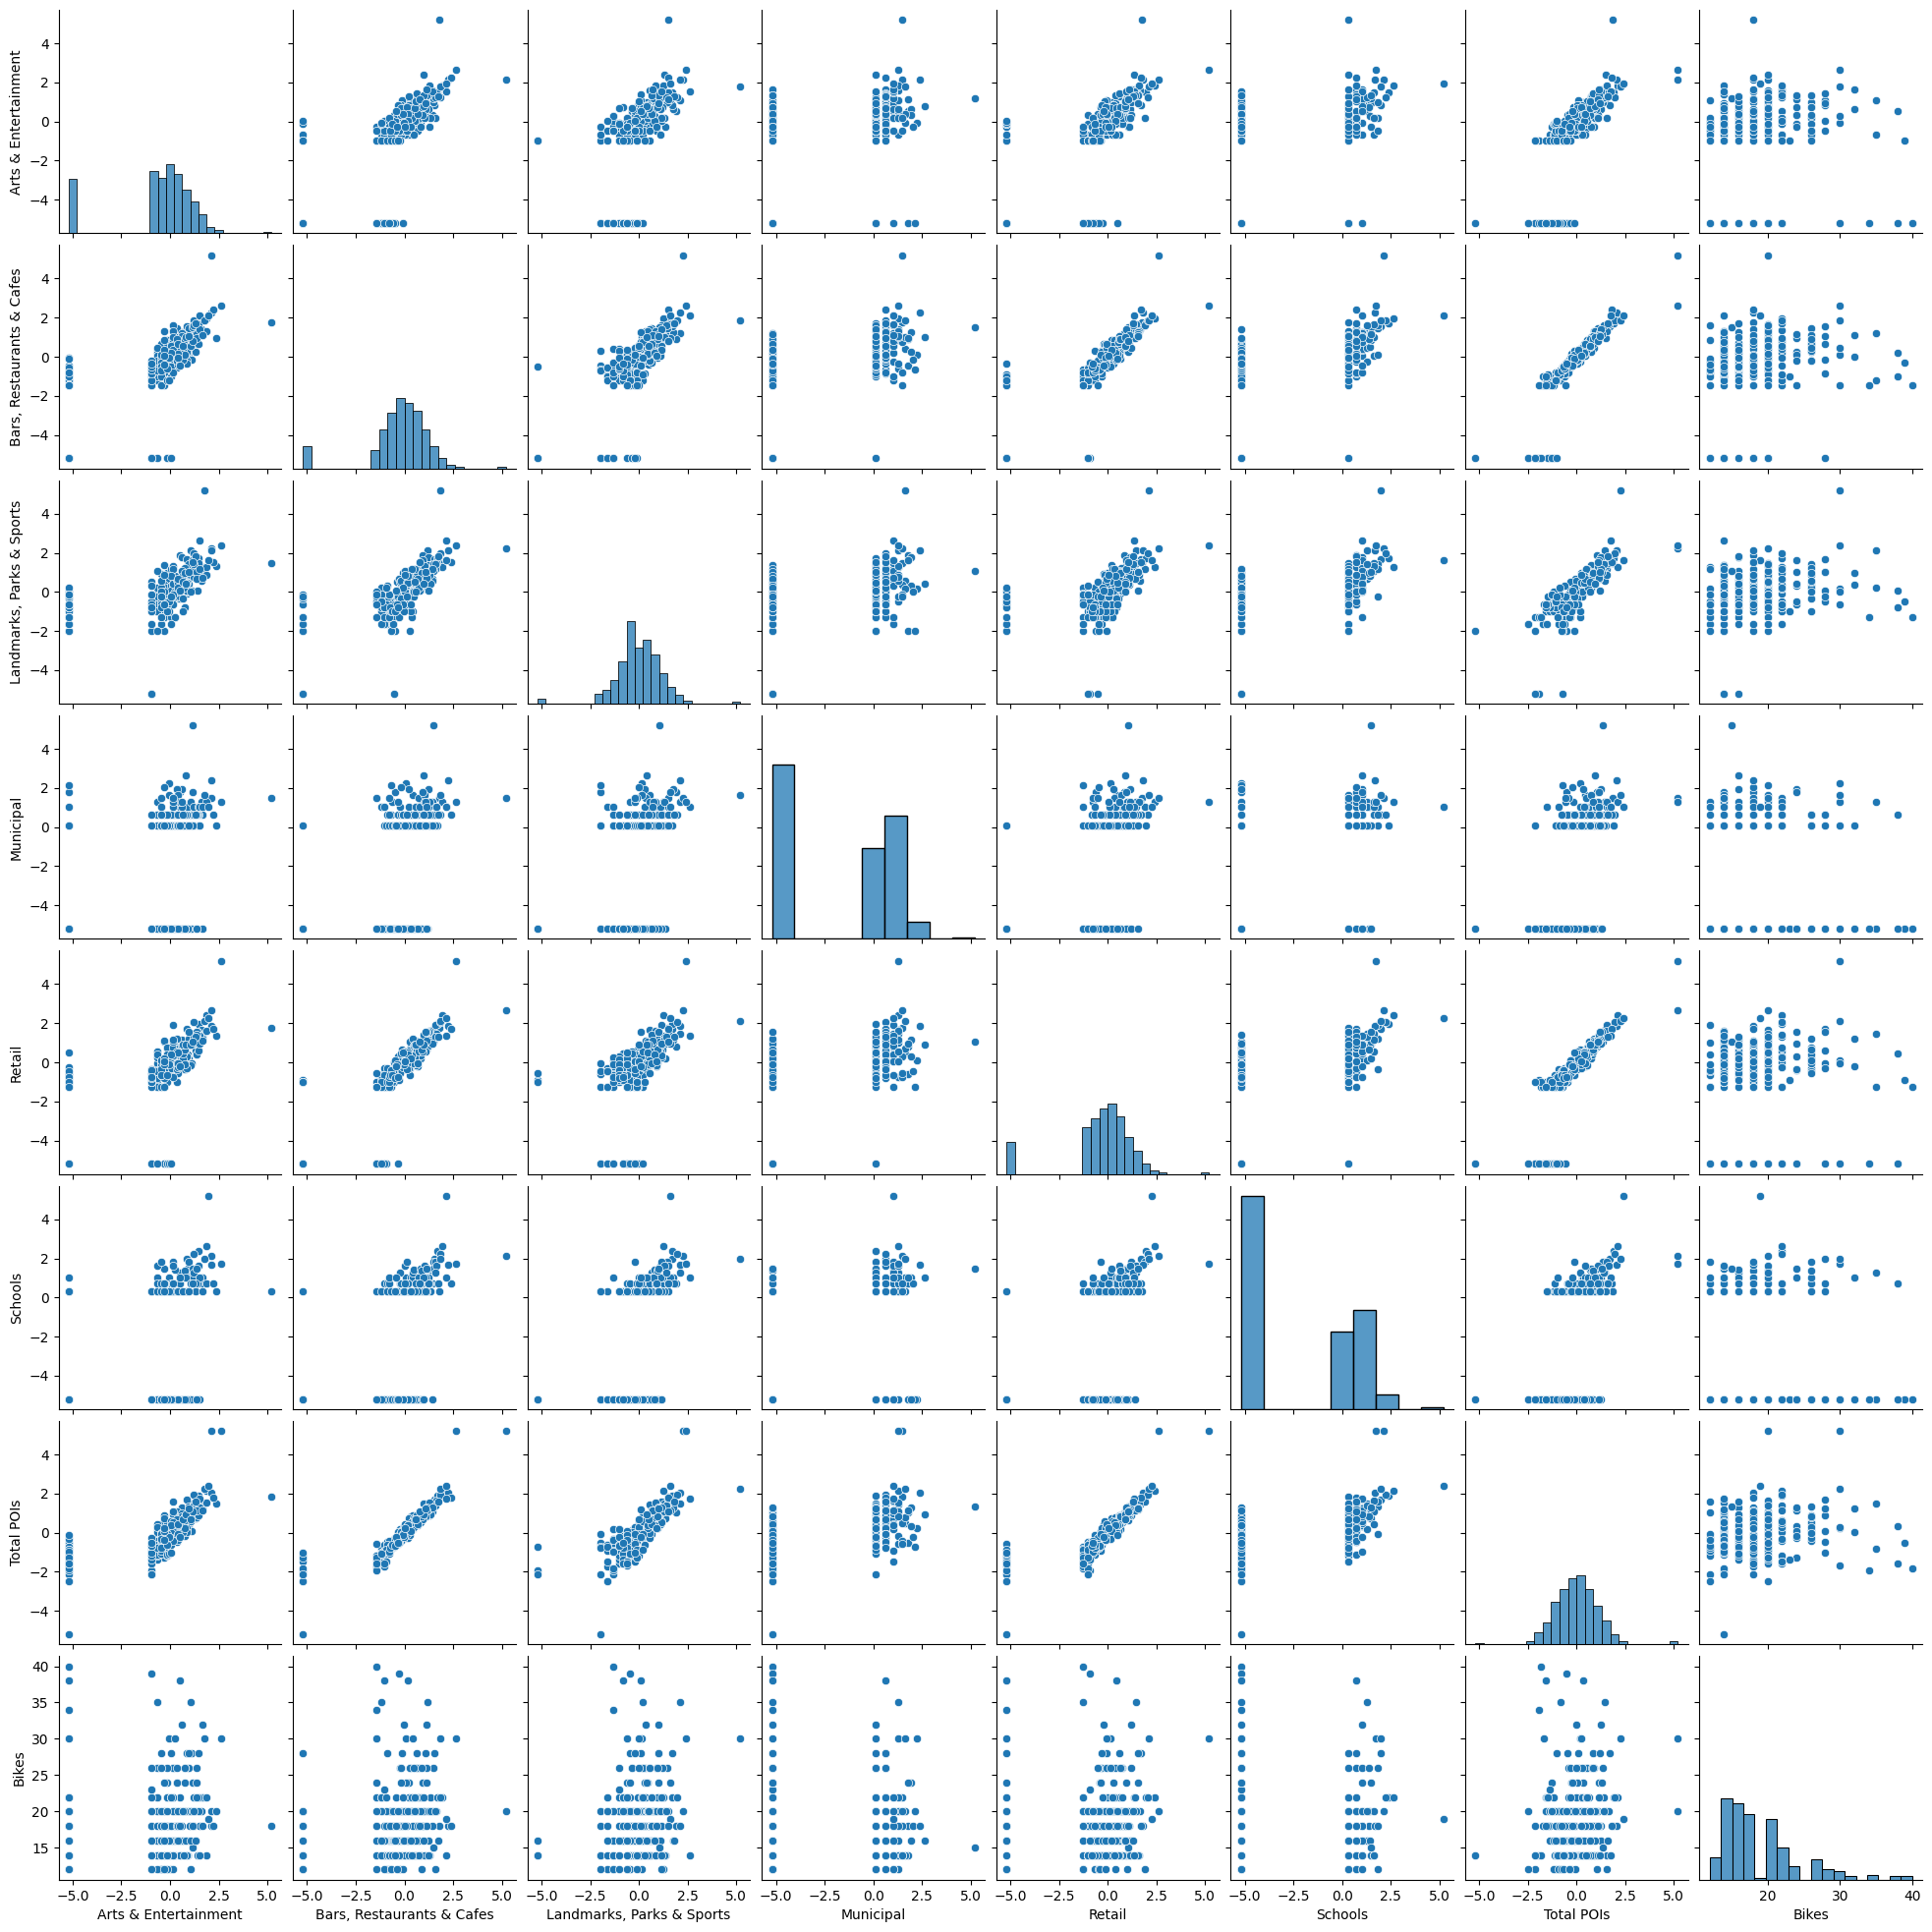

In [18]:
sns.pairplot(sum_normal)

In [30]:
y = sum_normal['Bikes']
X = sum_normal.drop(['Bikes', 'Bars, Restaurants & Cafes', 'Municipal'], axis=1)
X= sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Bikes   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     5.260
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           0.000134
Time:                        09:28:50   Log-Likelihood:                -734.85
No. Observations:                 241   AIC:                             1482.
Df Residuals:                     235   BIC:                             1503.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Provide model output and an interpretation of the results. 

After normalizing my data, the adjusted R-Squared value improved marginally to .082. There are variables left in this model with p-values above the threshold of significance. However, when those variables were removed, the adjusted R-Squared value decreased.

# Stretch

How can you turn the regression model into a classification model?

I could instead look to predict whether a station would have more than 18 bike slots or 14-18 slots.